![alt text](http://media5.datahacker.rs/2018/06/logo-crno.png)

[](https://)[datahacker.rs](http://datahacker.rs)

In [0]:
# Necessary imports
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

device = ("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
x1 = np.random.randn(2000)*0.5+3
x2 = np.random.randn(2000)*0.5+2

x3 = np.random.randn(2000) *0.5 + 4
x4 = np.random.randn(2000) *0.5 + 5

In [0]:
# Creating a Matrix
X_1 = np.vstack([x1, x2])
X_2 = np.vstack([x3, x4])
X = np.hstack([X_1, X_2]).T

In [0]:
# Creating a Vector that contains classes (0, 1)
y = np.hstack([np.zeros(2000), np.ones(2000)])

In [0]:
print(X.shape)
print(y.shape)

(4000, 2)
(4000,)


Text(0, 0.5, 'feature 2')

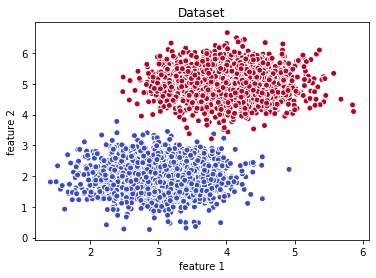

In [0]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm, edgecolors='w');
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [0]:
# Made a split on our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [0]:
# converting the datatypes from numpy array into tensors of type float
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train.squeeze()).type(torch.LongTensor)
y_test = torch.from_numpy(y_test.squeeze()).type(torch.LongTensor)

In [0]:
# checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([3200, 2])
torch.Size([800, 2])
torch.Size([3200])
torch.Size([800])


In [0]:
class ShallowNeuralNetwork(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(ShallowNeuralNetwork, self).__init__()
        self.hidden = nn.Linear(input_num, hidden_num) # hidden layer
        self.output = nn.Linear(hidden_num, output_num) # output layer
        self.sigmoid = nn.Sigmoid() # sigmoid activation function
        self.relu = nn.ReLU() # relu activation function
    
    def forward(self, x):
        x = self.relu(self.hidden(x)) 
        out = self.output(x)
        return out
    
    def predict(self, x):
        # apply softmax to output 
        predictions = self.sigmoid(self.forward(x))
        result = []
        # pick the class with the maximum weight
        for current_value in predictions:
            if current_value[0] > current_value[1]:
                result.append(0)
            else:
                result.append(1)
        return result

In [0]:
input_num = 2
hidden_num = 2
output_num = 2 # The output should be the same as the number of classes

model = ShallowNeuralNetwork(input_num, hidden_num, output_num)
model.to(device)
print(model)

ShallowNeuralNetwork(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)


In [0]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [0]:
# transfers our tensor from CPU to GPU 1 if CUDA is available
if torch.cuda.is_available():
    X_train = Variable(X_train).cuda()
    y_train = Variable(y_train).cuda()
    X_test = Variable(X_test).cuda()
    y_test = Variable(y_test).cuda()

num_epochs = 1000 # num of epochs

for epoch in range(num_epochs):
    # forward propagation
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch, num_epochs, loss.item()))
print('\nTraining Complete')

Epoch [0/1000], Loss: 1.04311
Epoch [200/1000], Loss: 0.15895
Epoch [400/1000], Loss: 0.04465
Epoch [600/1000], Loss: 0.02559
Epoch [800/1000], Loss: 0.01702

Training Complete


In [0]:
model_prediction = model.predict(X_test)

In [0]:
X_test = X_test.cpu().numpy() # We are moving our tensors to cpu now
y_test = y_test.cpu().numpy()
model_prediction = np.array(model_prediction)

In [0]:
print("Accuracy Score on test data ==>> {}%".format(accuracy_score(model_prediction, y_test) * 100))

Accuracy Score on test data ==>> 100.0%


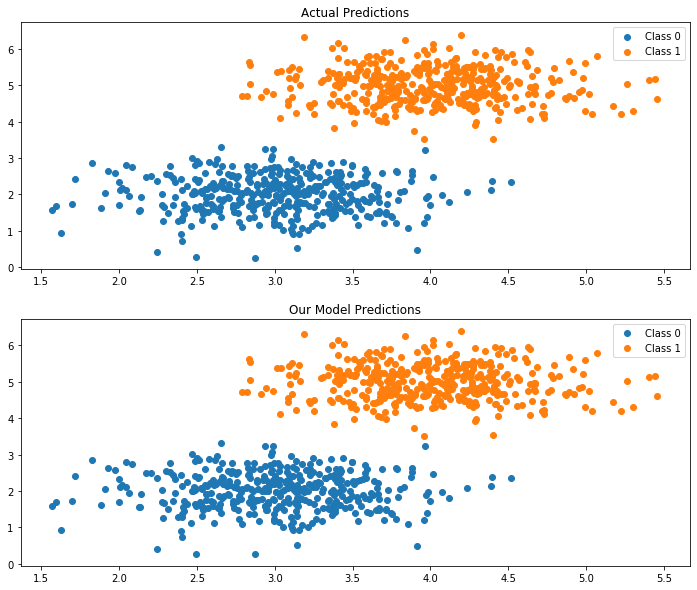

In [0]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# True Predictions
ax[0].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='Class 0', cmap=cm.coolwarm)
ax[0].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='Class 1', cmap=cm.coolwarm)
ax[0].set_title('Actual Predictions')
ax[0].legend()

# Models Predictions
ax[1].scatter(X_test[model_prediction==0, 0], X_test[model_prediction==0, 1], label='Class 0', cmap=cm.coolwarm)
ax[1].scatter(X_test[model_prediction==1, 0], X_test[model_prediction==1, 1], label='Class 1', cmap=cm.coolwarm)
ax[1].set_title('Our Model Predictions')
ax[1].legend()

In [0]:
#y_pred_1 = model.predict(Variable(torch.Tensor([[4.0, 5.0]])))  # Run this line if you are not using gpu support
y_pred_1 = model.predict(Variable(torch.Tensor([[4.0, 5.0]])).cuda()) 
print("predicted Y value: ", y_pred_1)

predicted Y value:  [1]


In [0]:
#y_pred_2 = model.predict(Variable(torch.Tensor([[2.0, 2.0]])))  # Run this line if you are not using gpu support
y_pred_2 = model.predict(Variable(torch.Tensor([[2.0, 2.0]])).cuda())
print("predicted Y value: ", y_pred_2)

predicted Y value:  [0]
